In [72]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.font_manager as font_manager
import seaborn as sns
import numpy as np
import seaborn as sns
%matplotlib inline

title_font = {'fontname':'Arial', 'size':'16'}
axis_font = {'fontname':'Arial', 'size':'14'}
plt.style.use("ggplot")
date = "00_32_54_01_03_2018"

## Episodic Controller

In [73]:
# Episodic Control
rewards_df = pd.read_csv("../debug/"+date+"/epc_rewards.log", names=["episodes",
                                                                    "steps",
                                                                    "max_steps",
                                                                    "rewards",
                                                                    "eps",
                                                                    "memory"])
env_df = pd.read_csv("../debug/"+date+"/env.log", names=["t1", "load",
                                                         "max_freq",
                                                         "freq",
                                                         "t2"],)
env_range = range(len(env_df))
print(env_df.tail())
print(rewards_df.tail())
env_df.columns

         t1  load  max_freq    freq    t2
71287  70.0  78.0      29.0   870.0  69.0
71288  69.0  76.0      29.0   870.0  69.0
71289  69.0  79.0      49.0  1471.0  70.0
71290  70.0  85.0      14.0   421.0  70.0
71291  70.0  83.0      39.0  1171.0  70.0
     episodes  steps  max_steps     rewards       eps  memory
795       795    250        250  378.136645  0.000013   20291
796       796    250        250  380.079813  0.000013   20541
797       797    250        250  382.925822  0.000013   20791
798       798    250        250  388.029531  0.000013   21041
799       799    250        250  389.578054  0.000013   21291


Index(['t1', 'load', 'max_freq', 'freq', 't2'], dtype='object')

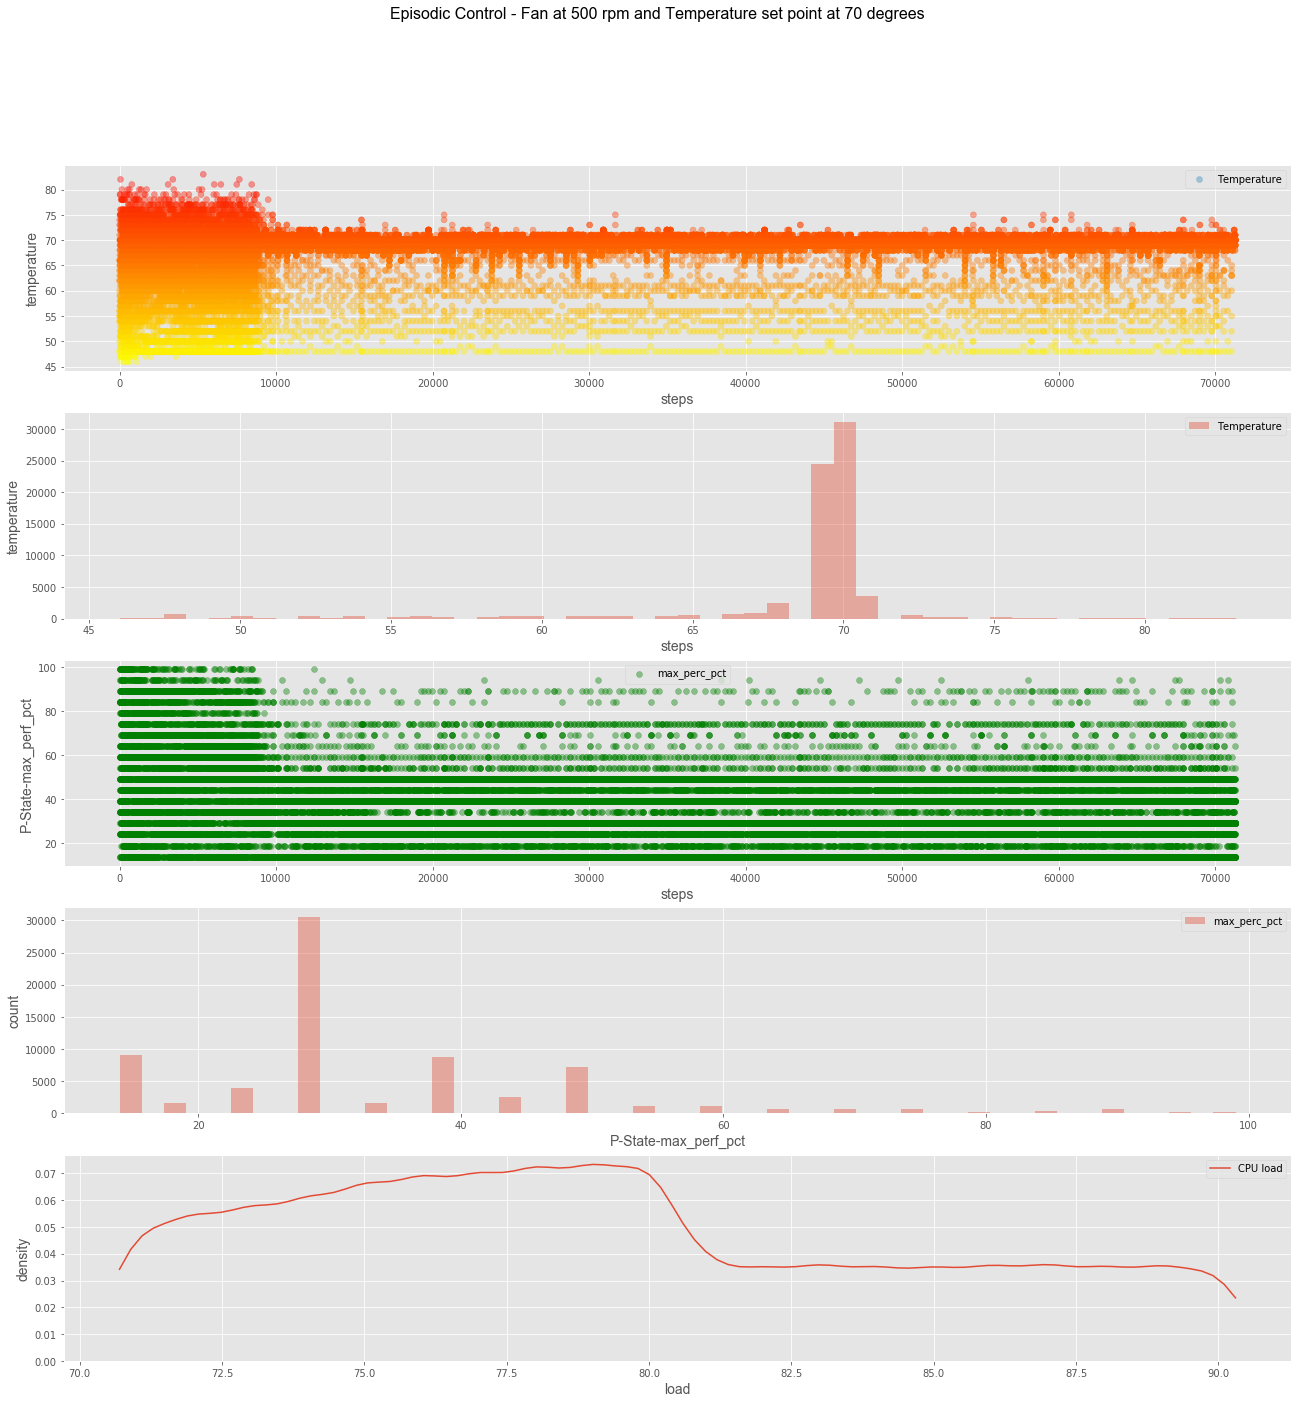

In [74]:
# EPC - let's plot
fig = plt.figure(figsize=(22, 22))
fig.suptitle("Episodic Control - Fan at 500 rpm and Temperature set point at 70 degrees",  **title_font)

ax = plt.subplot(511)
plt.scatter(env_range, env_df["t2"], c=env_df["t2"], cmap=plt.cm.autumn_r, label="Temperature", alpha=0.4)
plt.xlabel("steps", **axis_font)
plt.ylabel("temperature", **axis_font)
plt.legend()

ax = plt.subplot(512)
sns.distplot(env_df["t2"], label="Temperature", norm_hist=False, kde=False)
plt.xlabel("steps", **axis_font)
plt.ylabel("temperature", **axis_font)
plt.legend()

ax = plt.subplot(513)
plt.scatter(env_range, env_df["max_freq"], label="max_perc_pct", c="g", alpha=0.4)
plt.xlabel("steps", **axis_font)
plt.ylabel("P-State-max_perf_pct", **axis_font)
plt.legend()

ax = plt.subplot(514)
sns.distplot(env_df["max_freq"], label="max_perc_pct", norm_hist=False, kde=False)
plt.ylabel("count", **axis_font)
plt.xlabel("P-State-max_perf_pct", **axis_font)
plt.legend()
    
ax = plt.subplot(515)
sns.kdeplot(env_df["load"], label="CPU load", bw=0.1)
plt.xlabel("load", **axis_font)
plt.ylabel("density", **axis_font)
plt.legend()
plt.savefig("./plots/"+date+"epc_env_rewards.pdf")

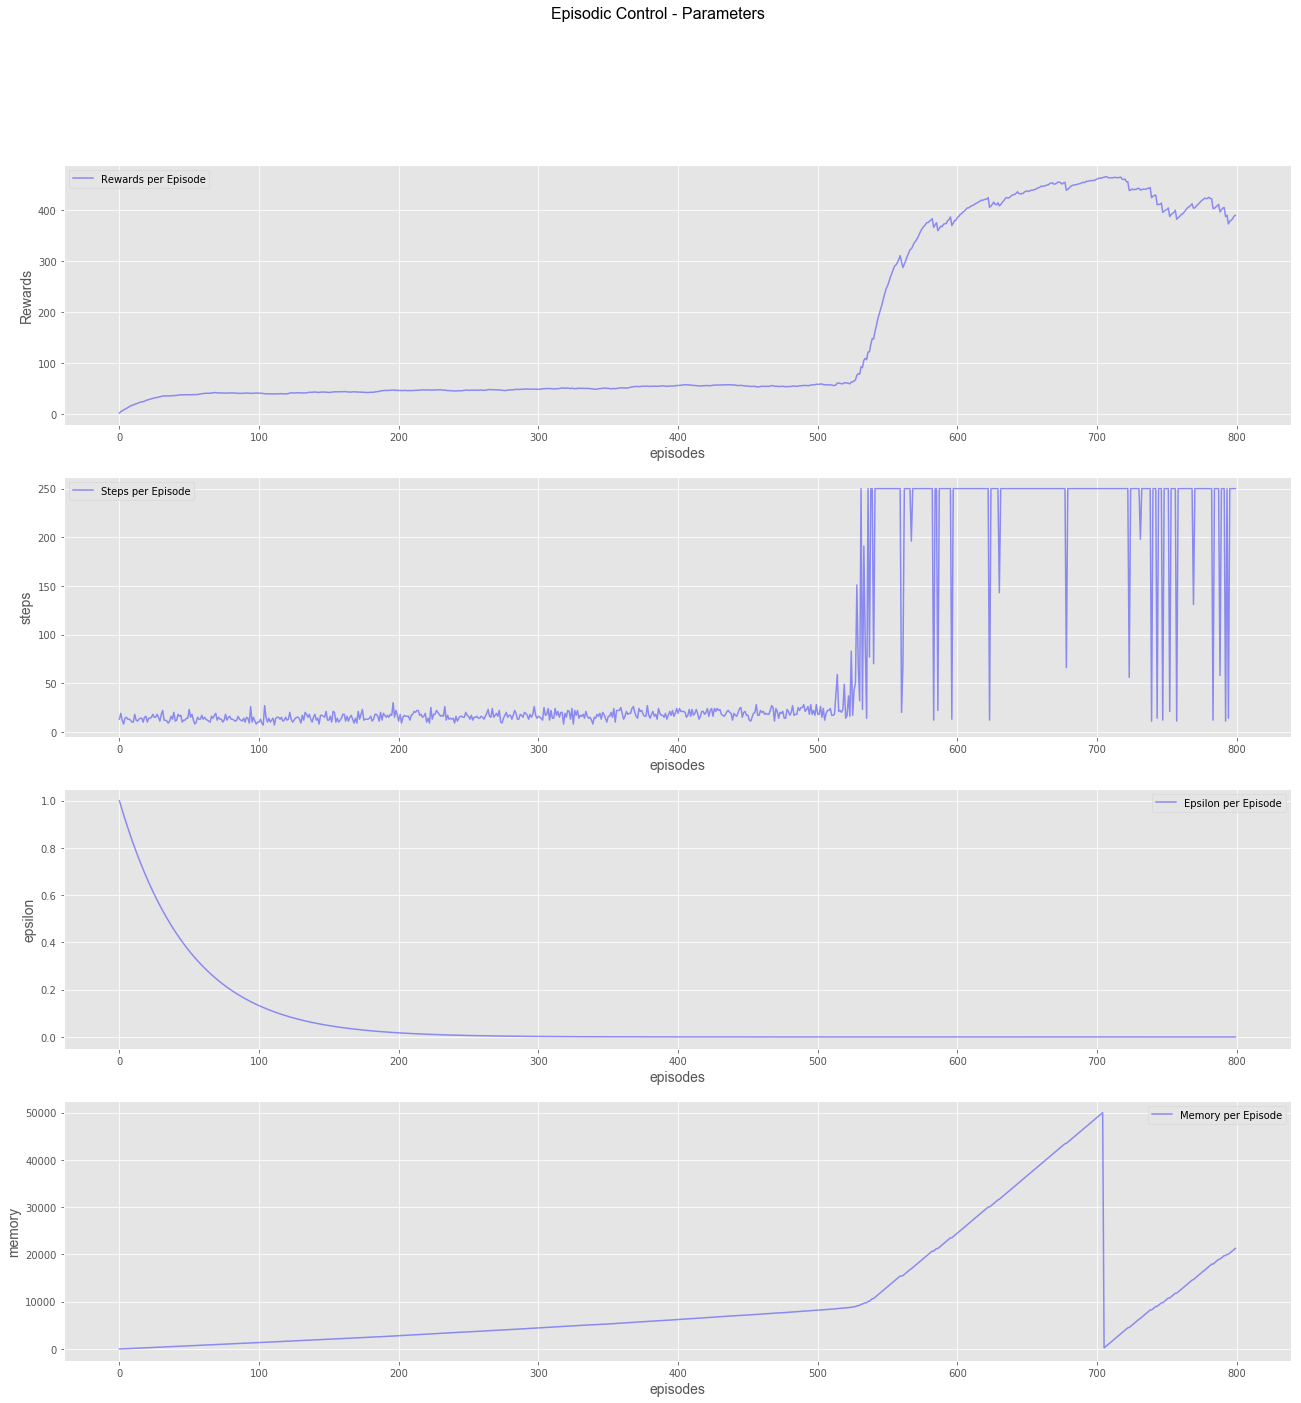

In [75]:
# EPC - parameters

fig = plt.figure(figsize=(22, 22))
fig.suptitle("Episodic Control - Parameters",  **title_font)

ax = plt.subplot(411)
plt.plot(rewards_df['episodes'], rewards_df["rewards"], label="Rewards per Episode",c="b", alpha=0.4)
plt.xlabel("episodes", **axis_font)
plt.ylabel("Rewards", **axis_font)
plt.legend()

ax = plt.subplot(412)
plt.plot(rewards_df['episodes'], rewards_df["steps"], label="Steps per Episode",c="b", alpha=0.4)
plt.xlabel("episodes", **axis_font)
plt.ylabel("steps", **axis_font)
plt.legend()

ax = plt.subplot(413)
plt.plot(rewards_df['episodes'], rewards_df["eps"], label="Epsilon per Episode",c="b", alpha=0.4)
plt.xlabel("episodes", **axis_font)
plt.ylabel("epsilon", **axis_font)
plt.legend()


ax = plt.subplot(414)
plt.plot(rewards_df['episodes'], rewards_df["memory"], label="Memory per Episode",c="b", alpha=0.4)
plt.xlabel("episodes", **axis_font)
plt.ylabel("memory", **axis_font)
plt.legend()